Import the dependencies!

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('haberman.csv')

In [4]:
df.head()

,age,operational_year,exil_node,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Six Questions

In [5]:
df.shape

(306, 4)

In [6]:
df.isnull().sum()

age                 0
operational_year    0
exil_node           0
survival            0
dtype: int64

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               289 non-null    int64
 1   operational_year  289 non-null    int64
 2   exil_node         289 non-null    int64
 3   survival          289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


In [12]:
df.describe()

,age,operational_year,exil_node,survival
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


EDA - Exploratory Data Analysis

In [14]:
#correlation
corr = df.corr()

<Axes: >

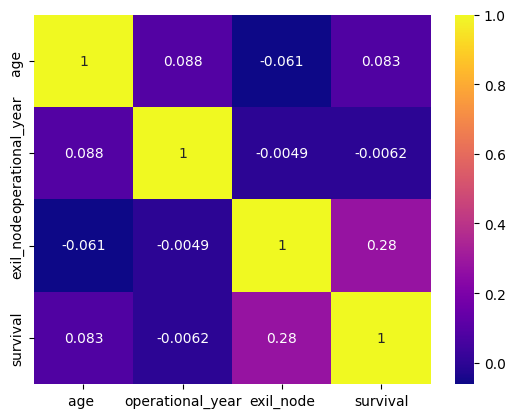

In [18]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='plasma')

Univariate Analysis

Histogram and Distribution Plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_29592\1353139330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age '])


<Axes: xlabel='age ', ylabel='Density'>

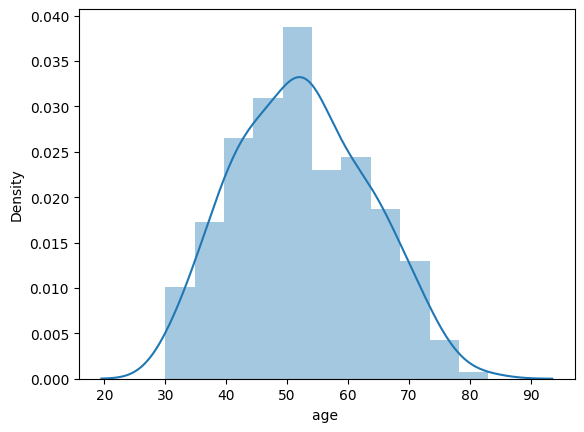

In [24]:
sns.distplot(df['age '])

C:\Users\DELL\AppData\Local\Temp\ipykernel_29592\1164331168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['operational_year'])


<Axes: xlabel='operational_year', ylabel='Density'>

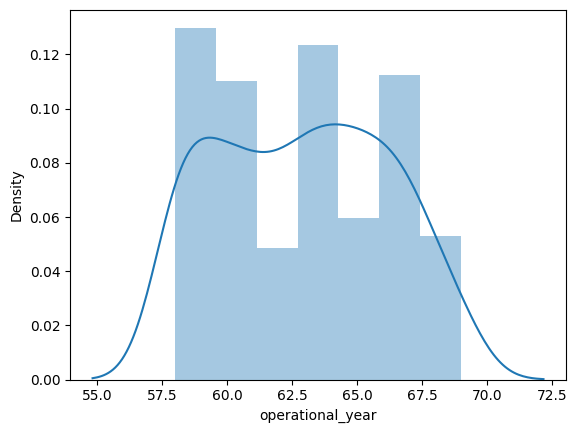

In [26]:
sns.distplot(df['operational_year'])

<Axes: xlabel='age ', ylabel='Count'>

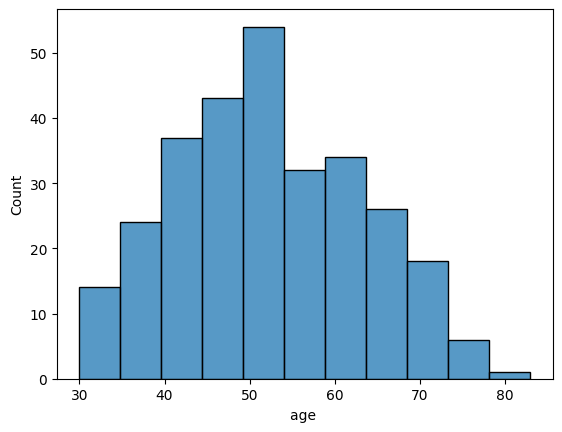

In [29]:
sns.histplot(df['age '])

Relation

<Axes: xlabel='age ', ylabel='operational_year'>

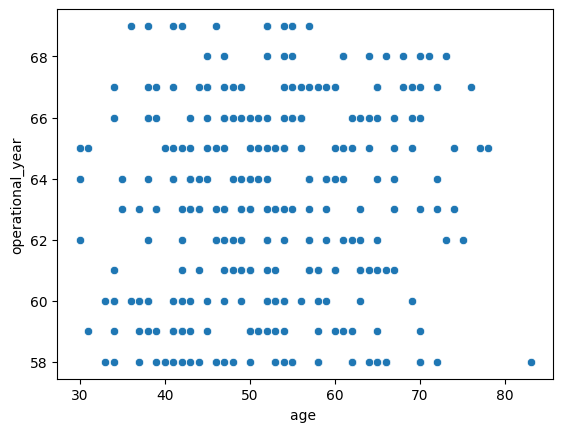

In [32]:
sns.scatterplot(x=df['age '], y=df['operational_year']) 

train test split

In [33]:
X = df.drop("survival", axis=1)
y = df['survival']


In [34]:
X.shape

(289, 3)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(231, 3)

Training models

In [38]:
df['survival'].value_counts()

survival
1    210
2     79
Name: count, dtype: int64

Selecting Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [41]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'gnb':GaussianNB()
}

for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(y_test, y_pred)}")

lg with accuracy : 0.7413793103448276
dtc with accuracy : 0.6724137931034483
gnb with accuracy : 0.7241379310344828


In [42]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.predict(X_test)

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1], dtype=int64)

Prediction System

In [47]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    pred = lg.predict(features).reshape(1,-1)
    return pred[0]


age = 50
oy = 61
en = 2

pred(age,oy,en)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [48]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    pred = lg.predict(features).reshape(1,-1)
    return pred[0]


age = 88
oy = 69
en = 1

pred(age,oy,en)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [49]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    pred = lg.predict(features).reshape(1,-1)
    return pred[0]


age = 25
oy = 60
en = 3

pred(age,oy,en)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [50]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    pred = lg.predict(features).reshape(1,-1)
    return pred[0]


age = 34
oy = 59
en = 0

pred(age,oy,en)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.predict(X_test)

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [54]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    pred = dtc.predict(features).reshape(1,-1)
    return pred[0]


age = 34
oy = 59
en = 0

pred(age,oy,en)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1], dtype=int64)